In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# STEP 1: Loading and inspecting the dataset

try:
   df = pd.read_csv("diabetes_clean.csv")
   print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
except FileNotFoundError:
    print("Error: File not found")

# print(df.dtypes)
    
# STEP 2: Binarize the variables

# 2.1 Binarize 'readmitted'
df['readmitted'] = df['readmitted'].apply(lambda x: 0 if x == 'NO' else 1)

# 2.1.2 Binarize 'metformin'
df['metformin'] = df['metformin'].apply(lambda x: 0 if x == 'No' else 1)

# 2.1.3 Binarize 'insulin'
df['insulin'] = df['insulin'].apply(lambda x: 0 if x == 'No' else 1)

# 2.1.4 Binarize 'change'
df['change'] = df['change'].apply(lambda x: 0 if x == 'No' else 1)

# 2.1.5 Binarize 'gender'
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# 2.2 Convert 'age' ranges to the midpoint of the range
age_map = {
    "[0-10)": 5,
    "[10-20)": 15,
    "[20-30)": 25,
    "[30-40)": 35,
    "[40-50)": 45,
    "[50-60)": 55,
    "[60-70)": 65,
    "[70-80)": 75,
    "[80-90)": 85,
    "[90-100)": 95
}
df['age'] = df['age'].map(age_map)

Dataset shape: 98053 rows, 47 columns


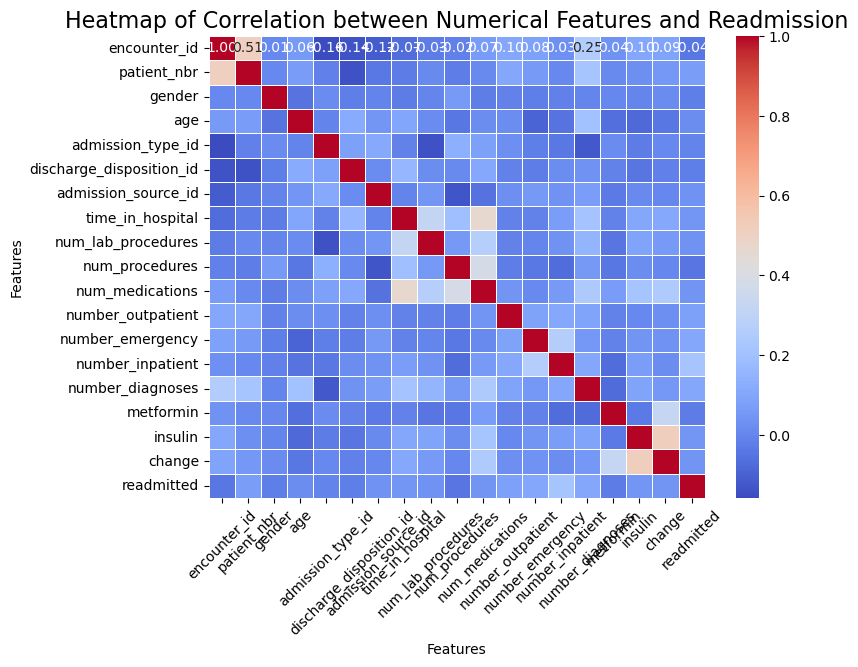

In [13]:
# STEP 3: Heatmap for Correlation between numerical features and readmission

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Add title and labels
plt.title('Heatmap of Correlation between Numerical Features and Readmission', size=16)
plt.xlabel('Features')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the heatmap
plt.show()

Here are some observations:

1. The diagonal elements are all 1, which means each feature is perfectly correlated with itself (as expected).

2. The features with the strongest correlation with readmission are:

- **encounter_id**: The encounter ID is a unique identifier for each patient encounter. It has a strong negative correlation with readmission, which is likely due to the fact that patients who are readmitted typically have a different encounter ID than their first encounter.
- **age**: Age has a strong positive correlation with readmission, which means that older patients are more likely to be readmitted.
- **admission_type_id**: The admission type ID has a strong negative correlation with readmission, which means that patients admitted for certain types of reasons are less likely to be readmitted.
- **discharge_disposition_id**: The discharge disposition ID has a strong negative correlation with readmission, which means that patients who are discharged for certain reasons are less likely to be readmitted.

3. The features with the weakest correlation with readmission are:

- **patient_nbr**: The patient number has a very weak positive correlation with readmission, which means that it is not a good predictor of readmission.
- **gender**: Gender has no correlation with readmission, which means that it is not a factor in readmission.


**What is the correlation for metformin and insulin?** 

A) Checking for correlation: Look for correlations between variables representing metformin and insulin use, and the readmission variable.

B) Performing statistical tests: Utilize statistical tests, such as chi-square or logistic regression, to examine whether there is a statistically significant relationship between metformin/insulin use and readmission.

In [15]:
# STEP 4: Checking correlation between metformin, insulin, and readmission

# 4.1 Correlation between metformin, insulin, and readmission
correlation_metformin = df[['metformin', 'readmitted']].corr().iloc[0, 1]
correlation_insulin = df[['insulin', 'readmitted']].corr().iloc[0, 1]

print(f"Correlation between metformin and readmission: {correlation_metformin:.2f}")
print(f"Correlation between insulin and readmission: {correlation_insulin:.2f}")

# STEP 5: Feature engineering - interaction between metformin and insulin

# 5.1 Create interaction term (metformin * insulin)
df['metformin_insulin_interaction'] = df['metformin'] * df['insulin']

# 5.2 Check correlation of the interaction term with readmission
correlation_interaction = df[['metformin_insulin_interaction', 'readmitted']].corr().iloc[0, 1]
print(f"Correlation between metformin-insulin interaction and readmission: {correlation_interaction:.2f}")

Correlation between metformin and readmission: -0.03
Correlation between insulin and readmission: 0.05
Correlation between metformin-insulin interaction and readmission: -0.01


In [19]:
# STEP 6: Pearson Correlation Coefficient and Chi-Square Test (Including 'change')

# Pearson Correlation Coefficient between readmitted and metformin
var1 = 'readmitted'
var2 = 'metformin'

# Check if both variables are numerical
if df[var1].dtype.kind in 'bifc' and df[var2].dtype.kind in 'bifc':
    correlation_coefficient = df[var1].corr(df[var2])
    print(f"Pearson correlation coefficient between {var1} and {var2}: {correlation_coefficient:.2f}")
else:
    print("Error: Both variables must be numerical for Pearson correlation")

# Pearson Correlation Coefficient between readmitted and insulin
var2 = 'insulin'
if df[var1].dtype.kind in 'bifc' and df[var2].dtype.kind in 'bifc':
    correlation_coefficient = df[var1].corr(df[var2])
    print(f"Pearson correlation coefficient between {var1} and {var2}: {correlation_coefficient:.2f}")
else:
    print("Error: Both variables must be numerical for Pearson correlation")

# Pearson Correlation Coefficient between readmitted and change
var2 = 'change'
if df[var1].dtype.kind in 'bifc' and df[var2].dtype.kind in 'bifc':
    correlation_coefficient = df[var1].corr(df[var2])
    print(f"Pearson correlation coefficient between {var1} and {var2}: {correlation_coefficient:.2f}")
else:
    print("Error: Both variables must be numerical for Pearson correlation")


# Chi-Square Test between metformin and readmission
if df['readmitted'].dtype.kind in 'bi' and df['metformin'].dtype.kind in 'bi':
    # Create a contingency table for categorical variables (already binarized)
    contingency_table = pd.crosstab(df['readmitted'], df['metformin'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results of the chi-square test
    print(f"Chi-square statistic between readmitted and metformin: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
else:
    print("Error: Both variables must be categorical for Chi-square test")

# Chi-Square Test between insulin and readmission
if df['readmitted'].dtype.kind in 'bi' and df['insulin'].dtype.kind in 'bi':
    contingency_table = pd.crosstab(df['readmitted'], df['insulin'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results of the chi-square test
    print(f"Chi-square statistic between readmitted and insulin: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
else:
    print("Error: Both variables must be categorical for Chi-square test")


# Chi-Square Test between change and readmission
if df['readmitted'].dtype.kind in 'bi' and df['change'].dtype.kind in 'bi':
    contingency_table = pd.crosstab(df['readmitted'], df['change'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results of the chi-square test
    print(f"Chi-square statistic between readmitted and change: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
else:
    print("Error: Both variables must be categorical for Chi-square test")


Pearson correlation coefficient between readmitted and metformin: -0.03
Pearson correlation coefficient between readmitted and insulin: 0.05
Pearson correlation coefficient between readmitted and change: 0.05
Chi-square statistic between readmitted and metformin: 77.46
p-value: 0.0000
Degrees of freedom: 1
Chi-square statistic between readmitted and insulin: 206.96
p-value: 0.0000
Degrees of freedom: 1
Chi-square statistic between readmitted and change: 199.22
p-value: 0.0000
Degrees of freedom: 1


### Results Interpretation:

#### >> Pearson Correlation Coefficients:
- **Readmitted and Metformin**: The correlation coefficient is **-0.03**, indicating a very weak negative correlation between metformin use and readmission. This suggests that metformin use does not have a strong linear relationship with the likelihood of readmission.
  
- **Readmitted and Insulin**: The correlation coefficient is **0.05**, showing a very weak positive correlation between insulin use and readmission. Insulin use does not display a significant linear relationship with readmission either.

- **Readmitted and Change**: The correlation coefficient is **0.05**, which indicates a very weak positive correlation. This means that whether a patient experienced a change in their medication regimen has a marginal association with readmission.

#### >> Chi-Square Tests:
- **Metformin and Readmission**:
  - Chi-square statistic: **77.46**
  - **p-value: 0.0000**. This extremely low p-value suggests that the relationship between metformin use and readmission is statistically significant. This indicates that metformin use does impact readmission rates, even though the direction and strength are not captured by this test.
  
- **Insulin and Readmission**:
  - Chi-square statistic: **206.96**
  - **p-value: 0.0000**. This shows a statistically significant association between insulin use and readmission, meaning insulin use has a notable effect on readmission rates. The larger Chi-square value suggests a stronger association compared to metformin.

- **Change and Readmission**:
  - Chi-square statistic: **199.22**
  - **p-value: 0.0000**. This result indicates a significant association between a change in medication and readmission. Changes in a patient's medication regimen may have a meaningful impact on readmission likelihood.

### Summary:

While the Pearson correlations for metformin, insulin, and change with readmission are weak, the Chi-square tests show **strong and significant associations**. This implies that these variables have a significant relationship with whether a patient is readmitted, even though their linear relationships are minimal.


In [23]:
# Pearson Correlation Coefficient: Time in hospital and Age (numerical)

# Pearson Correlation Coefficient between readmitted and time_in_hospital
var2 = 'time_in_hospital'
if df['readmitted'].dtype.kind in 'bifc' and df[var2].dtype.kind in 'bifc':
    correlation_coefficient = df['readmitted'].corr(df[var2])
    print(f"Pearson correlation coefficient between readmitted and {var2}: {correlation_coefficient:.2f}")
else:
    print("Error: Both variables must be numerical for Pearson correlation")

# Pearson Correlation Coefficient between readmitted and age
var2 = 'age'
if df['readmitted'].dtype.kind in 'bifc' and df[var2].dtype.kind in 'bifc':
    correlation_coefficient = df['readmitted'].corr(df[var2])
    print(f"Pearson correlation coefficient between readmitted and {var2}: {correlation_coefficient:.2f}")
else:
    print("Error: Both variables must be numerical for Pearson correlation")

# Chi-Square Test: Admission type and Gender (categorical)

# Chi-Square Test between readmitted and admission_type
if df['readmitted'].dtype.kind in 'bi' and df['admission_type_id'].dtype.kind in 'O':
    # Create a contingency table
    contingency_table = pd.crosstab(df['readmitted'], df['admission_type_id'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-square statistic between readmitted and admission_type: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
else:
    print("Error: Both variables must be categorical for Chi-square test")

# Chi-Square Test between readmitted and gender
if df['readmitted'].dtype.kind in 'bi' and df['gender'].dtype.kind in 'bi':
    # Create a contingency table
    contingency_table = pd.crosstab(df['readmitted'], df['gender'])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Chi-square statistic between readmitted and gender: {chi2:.2f}")
    print(f"p-value: {p:.4f}")
    print(f"Degrees of freedom: {dof}")
else:
    print("Error: Both variables must be categorical for Chi-square test")

Pearson correlation coefficient between readmitted and time_in_hospital: 0.05
Pearson correlation coefficient between readmitted and age: 0.02
Error: Both variables must be categorical for Chi-square test
Chi-square statistic between readmitted and gender: 30.33
p-value: 0.0000
Degrees of freedom: 1


### Results Interpretation

#### >> Pearson Correlation Coefficients:
1. **Readmitted and Time in Hospital**: 
   - **Correlation Coefficient**: **0.05**
   - **Interpretation**: This value indicates a very weak positive correlation between the time a patient spends in the hospital and the likelihood of readmission. Longer hospital stays do not significantly influence whether a patient is readmitted.

2. **Readmitted and Age**:
   - **Correlation Coefficient**: **0.02**
   - **Interpretation**: This value represents an extremely weak positive correlation between age and readmission. There is virtually no linear relationship between a patient's age and the probability of being readmitted, suggesting that age does not meaningfully impact readmission rates.

#### >> Chi-Square Test:
1. **Chi-Square Test between Readmission and Gender**:
   - **Chi-square Statistic**: **30.33**
   - **p-value**: **0.0000**
   - **Degrees of Freedom**: **1**
   - **Interpretation**: The chi-square statistic of **30.33** indicates a strong association between gender and readmission status. The p-value of **0.0000** signifies that this association is statistically significant, suggesting that the likelihood of readmission varies significantly between different genders. This implies that gender could be an important factor in predicting readmission rates.

### Summary of Results:
- The **Pearson correlation coefficients** for both time in hospital and age with readmission are very low, indicating that these variables do not have a meaningful linear relationship with readmission.
- The **Chi-square test** results for gender indicate a significant association with readmission, highlighting that gender may influence whether patients are readmitted to the hospital.

